In [ ]:
%pip install scikit-learn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC())
])

In [3]:
#Hyperparameter tuning using GridSearchCV
param_grid = {
    "svm__C": [0.1, 1, 10],
    "svm__gamma": [0.01, 0.1, 1],
    "svm__kernel": ["rbf", "poly"]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC())]),
             n_jobs=-1,
             param_grid={'svm__C': [0.1, 1, 10], 'svm__gamma': [0.01, 0.1, 1],
                         'svm__kernel': ['rbf', 'poly']},
             verbose=1)

In [4]:
y_pred = grid_search.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[94  6]
 [11 89]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       100
           1       0.94      0.89      0.91       100

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.91       200
weighted avg       0.92      0.92      0.91       200



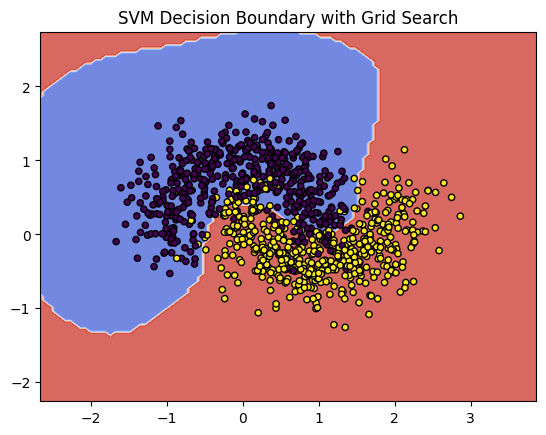

In [5]:
DecisionBoundaryDisplay.from_estimator(
    grid_search.best_estimator_,
    X,
    response_method="predict",
    cmap=plt.cm.coolwarm,
    alpha=0.8
)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors='k')
plt.title("SVM Decision Boundary with Grid Search")
plt.show()